In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from torchgeo.datasets import SEN12MS

In [2]:
ROOT_DIR = os.path.expanduser("~/mount/data/")

## Visualization example

In [3]:
DFC2020_CLASS_MAPPING = np.array([
    0,  # maps 0s to 0
    1,  # maps 1s to 1
    1,  # maps 2s to 1
    1,  # ...
    1,
    1,
    2,
    2,
    3,
    3,
    4,
    5,
    6,
    7,
    6,
    8,
    9,
    10,
])

DFC2020_CLASS_CMAP = matplotlib.colors.ListedColormap([
    '#ffffff',
    '#009900',
    '#c6b044',
    '#fbff13',
    '#b6ff05',
    '#27ff87',
    '#c24f44',
    '#a5a5a5',
    '#69fff8',
    '#f9ffa4',
    '#1c0dff',
])

In [4]:
dataset = SEN12MS(
    ROOT_DIR,
    split="train",
    checksum=False
)

In [5]:
def show_image_pair(sample, scale_factor=4, title=None):
    im = sample["image"]
    im = np.rollaxis(im.numpy(),0,3).copy() # convert to HxWxC format
    im = im[:,:,[5,4,3]] # select the RGB bands
    im = np.clip(im*scale_factor, 0, 1) # scale up the values for better pictures and make sure they are in [0,1]
    
    mask = sample["mask"][0,:,:].numpy()
    mask = DFC2020_CLASS_MAPPING[mask] # convert the IGBP labels to DFC2020
    
    fig, axs = plt.subplots(1,2,figsize=(9,4))
    axs[0].imshow(im)
    axs[0].axis("off")
    axs[1].imshow(mask, vmin=0, vmax=10, cmap=DFC2020_CLASS_CMAP, interpolation="none")
    axs[1].axis("off")
    if title is not None:
        plt.suptitle(title)
    plt.show()
    plt.close()

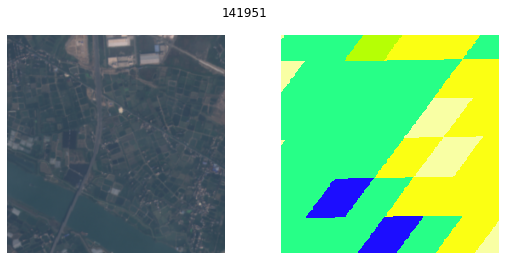

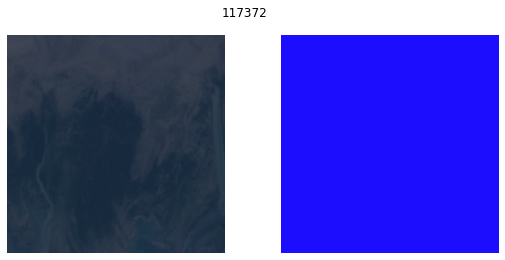

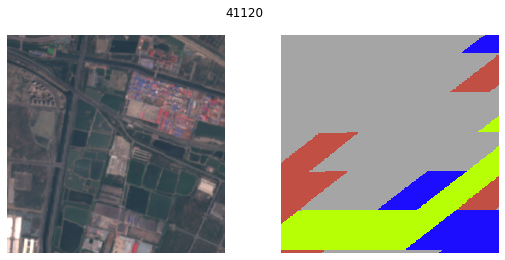

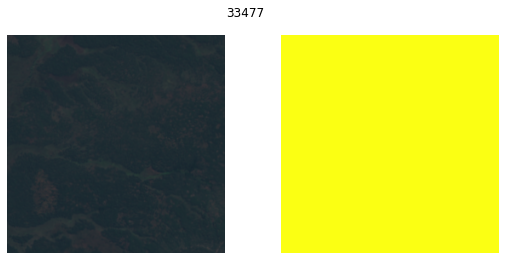

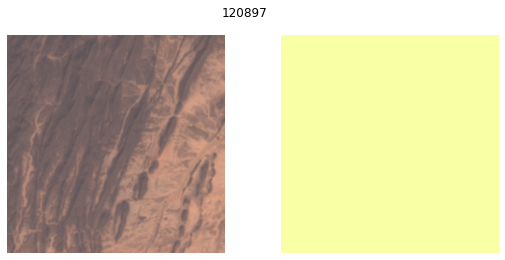

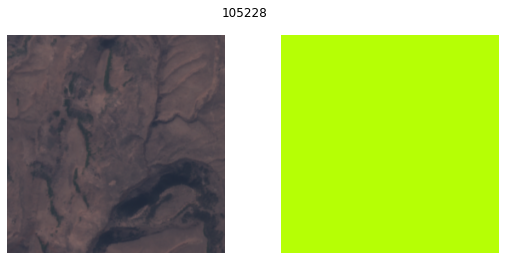

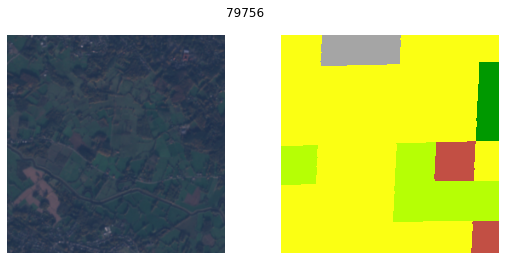

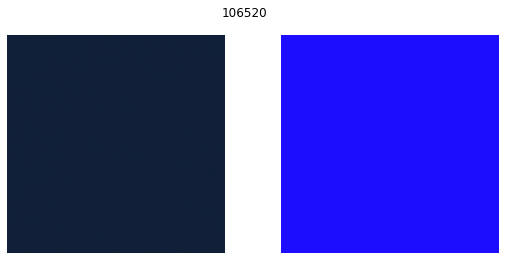

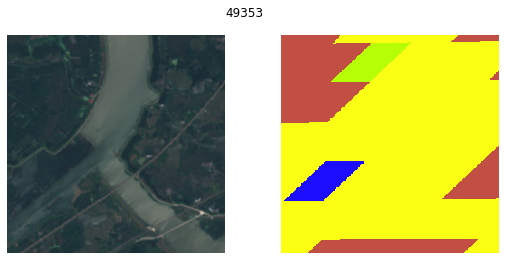

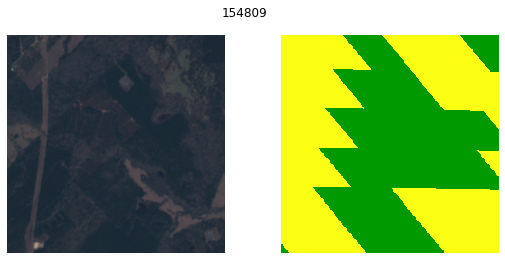

In [6]:
N = len(dataset)
for idx in np.random.randint(0, N, size=(10)):
    show_image_pair(dataset[idx], 1/4000, idx)

## Test DataLoader

In [7]:
dataloader = DataLoader(dataset, batch_size=32)

In [8]:
for batch_idx, batch in enumerate(dataloader):
    print(batch["image"].shape)
    if batch_idx == 5:
        break

torch.Size([32, 15, 256, 256])
torch.Size([32, 15, 256, 256])
torch.Size([32, 15, 256, 256])
torch.Size([32, 15, 256, 256])
torch.Size([32, 15, 256, 256])
torch.Size([32, 15, 256, 256])
